In [1]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - OzFlux ET sites

#### Benchmarking dataset information
The actual ET (in mm) dataset consists of actual evapotranspiration estimates from the OzFlux flux tower network observations infilled accoring to the DINGO processing
<br>
##### Source:
Beringer, J., Hutley, L. B., McHugh, I., Arndt, S. K., Campbell, D., Cleugh, H. A., Cleverly, J., Resco de Dios, V., Eamus, D., Evans, B., Ewenz, C., Grace, P., Griebel, A., Haverd, V., Hinko-Najera, N., Huete, A., Isaac, P., Kanniah, K., Leuning, R., Liddell, M. J., Macfarlane, C., Meyer, W., Moore, C., Pendall, E., Phillips, A., Phillips, R. L., Prober, S. M., Restrepo-Coupe, N., Rutledge, S., Schroder, I., Silberstein, R., Southall, P., Yee, M. S., Tapper, N. J., van Gorsel, E., Vote, C., Walker, J., and Wardlaw, T, 2016. An introduction to the Australian and New Zealand flux tower network – OzFlux, Biogeosciences, 13, 5895-5916.<br>
Beringer, J., McHugh, I., Hutley, L.B., Isaac, P. and Kljun, N., 2016. Dynamic INtegrated Gap-filling and partitioning for OzFlux (DINGO). Biogeosciences Discuss., 2016: 1-36.
	

This notebook goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
 6.1 Time series<br>
 6.2 Regression Plots<br>
7. Statistics plotting<br>

### 1. Import required libraries

In [33]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

from awrams.models.settings import TRAINING_DATA_PATH

### 2.  Set up benchmarking configuration
Comparison at OzFlux ET sites <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1. Observations to use

In [34]:
data_path = TRAINING_DATA_PATH + '/benchmarking/ozflux/'

#obs_csv = data_path +'/ozflux_monthly.csv'
obs_csv = data_path + '/Dingo_daily.csv'

### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [35]:
et = Benchmark("OzFlux", "evapotranspiration")
et.site_set_name = ['ET flux tower benchmarking','OzFlux']
et.id_type = 'site'
et.site_id_type = 'Unique_ID'
et.site_ref_type = 'ID'

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
et.load(obs_csv)

In [36]:
et.sites

['Nimmo',
 'Fogg Dam',
 'Wombat',
 'Alice Springs',
 'Daly River Pasture',
 'Whroo',
 'Adelaide River',
 'Daly River Uncleared',
 'Yanco Jaxa',
 'Red Dirt Melon Farm',
 'Cumberland Plains',
 'Wallaby Creek',
 'Warra',
 'Daintree',
 'Calperum',
 'Sturt Plains',
 'Tumbarumba',
 'Great Western Woodlands',
 'Riggs Creek',
 'Howard Springs',
 'Dry River',
 'Gingin',
 'Ti Tree East']

### 4. Add models to be benchmarked
Read data from pre-processed csv. These pre-processed csvs were in this case obtained by using the extraction routine for the relevant variable for the points to be benchmarked

This step processes the data and calculates all the statistics [can take a while]

In [37]:
# Reading data from pre-processed csv

csv_data = data_path+'/AWRAMSI_v5QES_AWRAL_etot_avg_OzFlux_DINGO.csv'
et.add_model("AWRAMSI_v5_0_AWRAL", data_csv=csv_data)

In [38]:
csv_data = data_path+'/awral_etot_avg.csv'
et.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

In [39]:
## Sample code here to extract data at OzFlux sites
# import pandas as pd
# from awrams.utils import extents
# from awrams.utils.io.data_mapping import SplitFileManager
# from awrams.utils.processing.extract import extract_from_filemanager


# site_loc_csv = '../../benchmarking/awrams/benchmarking/data/SiteLocationsWithUniqueID.csv'
# site_loc_data = pd.read_csv(site_loc_csv)
# var_names = ['etot_avg']
# data_path = '/path/to/outputs/'
# period = dt.dates('jul 2010 - jun 2011')
# mod_site_list = ['OzFlux_' + site for site in et.sites] # or a subset thereof

# for var_name in var_names:
#     pattern = data_path + '/%s*' % var_name
#     sfm = SplitFileManager.open_existing(data_path,pattern,var_name)
#     georef = sfm.get_extent()
#     extent_map = {}
    
#     for site in mod_site_list:
#         coords= site_loc_data[site_loc_data['Unique_ID']==site][['lats','lons']].values[0]
#         extent_map[site] = georef.factory.get_by_cell_coords(coords[0],coords[1])

#     df = extract_from_filemanager(sfm,
#                  extent_map,
#                  period)
#     df

#     df.to_csv('./for_oznet/'+ var_name+ '.csv' )

#### 4.1 Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [40]:
et.benchmark.selection

['AWRAMSI_v5_0_AWRAL', 'AWRAMSI_v4_0_AWRAL']

In [41]:
et.benchmark.selection.AWRAMSI_v5_0_AWRAL.unselect()
#et.benchmark.selection.AWRAMSI_v5_0_AWRAL.select()

### 5. View Benchmarking Statistics
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [42]:
et.benchmark.stat_percentiles(freq='m')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.705912,0.707152,0.712113,0.718315,0.821918,0.9048,0.92552


In [43]:
et.benchmark.stat(statistic='bias_relative', freq='m')

,AWRAMSI_v4_0_AWRAL
Howard Springs,-0.115299
Tumbarumba,-0.052485
Wallaby Creek,-0.073684
all,-0.085683


In [44]:
et.benchmark.stat(statistic='bias')

,AWRAMSI_v4_0_AWRAL
Howard Springs,-11.302368
Tumbarumba,-3.802094
Wallaby Creek,-5.195055
all,-7.016001


In [45]:
et.benchmark.stat(statistic='nse', freq='m')

,AWRAMSI_v4_0_AWRAL
Howard Springs,0.085005
Tumbarumba,0.799203
Wallaby Creek,0.476190
all,0.527920


In [46]:
et.benchmark.stat(statistic='pearsons_r', freq='m')

,AWRAMSI_v4_0_AWRAL
Howard Springs,0.718315
Tumbarumba,0.925520
Wallaby Creek,0.705912
all,0.773188


In [47]:
et.benchmark.stat(statistic='rmse', freq='m')

,AWRAMSI_v4_0_AWRAL
Howard Springs,28.268805
Tumbarumba,13.749657
Wallaby Creek,34.615527
all,25.578780


In [48]:
et.benchmark.stat(freq='y') # mean

,AWRAMSI_v4_0_AWRAL,OzFlux
Howard Springs,1009.714351,1141.306205
Tumbarumba,799.163370,843.430611
Wallaby Creek,783.715709,846.056370
all,877.611494,959.854622


In [49]:
et.benchmark.stat(statistic='bias_relative', freq='y')

,AWRAMSI_v4_0_AWRAL
Howard Springs,-0.115299
Tumbarumba,-0.052485
Wallaby Creek,-0.073684
all,-0.085683


In [50]:
et.benchmark.stat(statistic='bias', freq='y')

,AWRAMSI_v4_0_AWRAL
Howard Springs,-131.591853
Tumbarumba,-44.267242
Wallaby Creek,-62.340660
all,-82.243128


In [51]:
et.benchmark.stat(statistic='nse', freq='y')

,AWRAMSI_v4_0_AWRAL
Howard Springs,-1.690791
Tumbarumba,0.247863
Wallaby Creek,0.018337
all,0.219627


In [52]:
et.benchmark.stat(statistic='pearsons_r', freq='y')

,AWRAMSI_v4_0_AWRAL
Howard Springs,0.663788
Tumbarumba,0.708580
Wallaby Creek,0.345003
all,0.627351


In [53]:
et.benchmark.obs.annual['Wallaby Creek']

2000-12-31            NaN
2001-12-31            NaN
2002-12-31            NaN
2003-12-31            NaN
2004-12-31       4.444376
2005-12-31    1377.081907
2006-12-31     809.459382
2007-12-31     818.929231
2008-12-31     762.786936
2009-12-31     400.077413
2010-12-31     593.463410
2011-12-31     796.637752
2012-12-31    1192.899539
2013-12-31            NaN
2014-12-31            NaN
2015-12-31            NaN
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [54]:
et.benchmark.models.AWRAMSI_v5_0_AWRAL.data.annual['Wallaby Creek']

2005-12-31    785.781696
2006-12-31    696.550432
2007-12-31    730.331810
2008-12-31    737.865499
2009-12-31    735.266110
2010-12-31    798.573239
2011-12-31    816.617927
2012-12-31    790.715234
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [55]:
et.benchmark.stat(statistic='rmse', freq='y')

,AWRAMSI_v4_0_AWRAL
Howard Springs,213.878886
Tumbarumba,94.090577
Wallaby Creek,290.684178
all,200.023563


### 6. View benchmarking plots: 
### 6.1 Time Series

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

TypeError: asfreq() missing 1 required positional argument: 'freq'

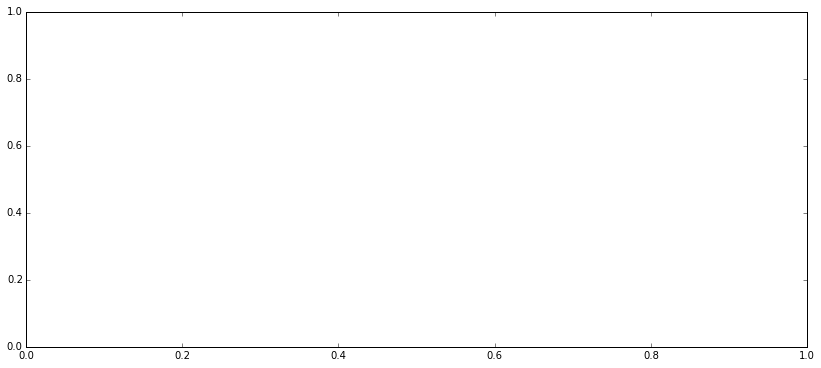

In [65]:
for site in et.sites:
    p = et.benchmark.plot_timeseries(site, freq='d') #u'Tumbarumba')

In [63]:
et

### 6.2 Regression Plots

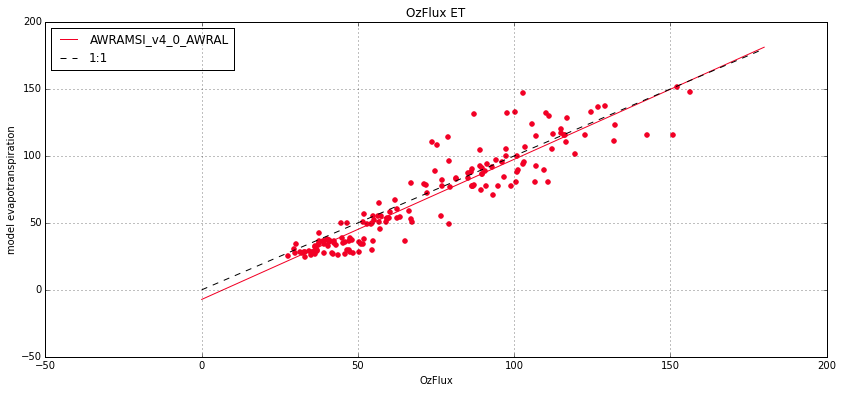

In [66]:
p = et.benchmark.plot_regression(title="OzFlux ET", site='Tumbarumba')

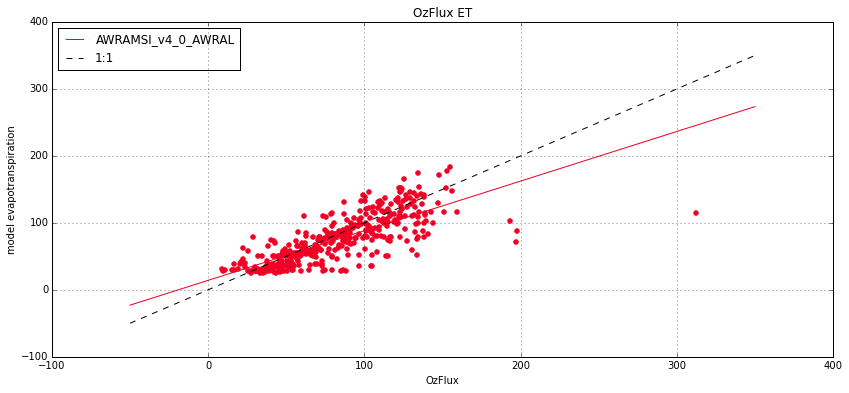

In [67]:
p = et.benchmark.plot_regression(title="OzFlux ET")

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

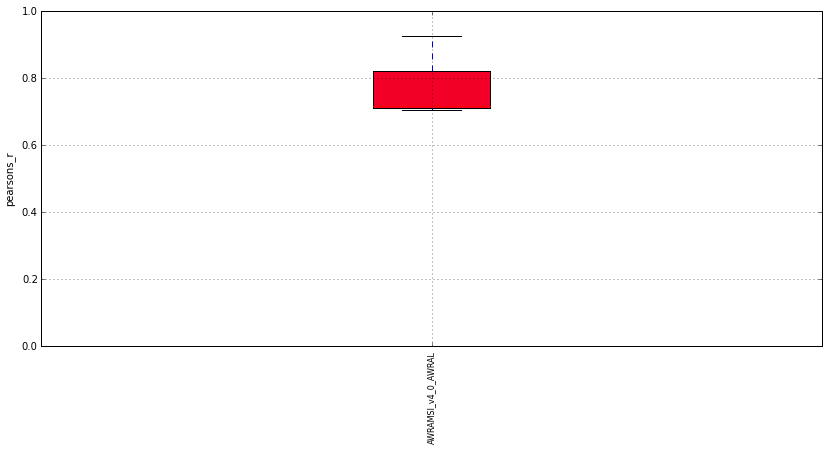

In [68]:
p = et.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])